In [1]:
using AutomotiveDrivingModels
using AutoViz
using DeepQLearning
using POMDPs
using Flux
using POMDPModels
using POMDPSimulators
using Parameters
using Reel
using Random
using Printf
using POMDPSimulators
using Interact
using AutomotivePOMDPs
using LinearAlgebra
using Revise
using RLInterface
# using POMDPModelChecking
using Records
using Vec
using AutoUrban
using AutomotiveSensors
using POMDPPolicies

┌ Info: Loading Cairo backend into Compose.jl
└ @ Compose /Users/pegasus/.julia/packages/Compose/wlPCt/src/Compose.jl:164


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/c4cc9f5792a6a99cf8c8f95031318a0990508355-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/c4cc9f5792a6a99cf8c8f95031318a0990508355-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

loaded


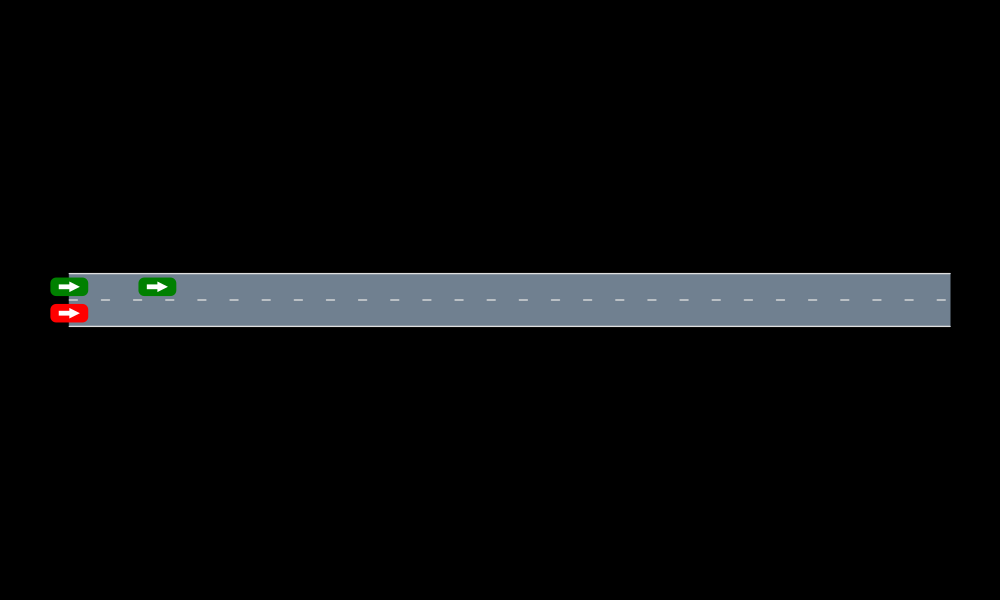

In [2]:
scene = Scene()
timestep = 0.1
ncars = 3

carcolors = Dict{Int,Colorant}()
carcolors[1] = colorant"red"
carcolors[2] = colorant"green"
carcolors[3] = colorant"green"

models = Dict{Int, DriverModel}()
models[1] = Tim2DDriver(timestep, rec=SceneRecord(1, timestep, ncars))
models[2] = Tim2DDriver(timestep, rec=SceneRecord(1, timestep, ncars))
models[3] = Tim2DDriver(timestep, rec=SceneRecord(1, timestep, ncars))

road_length = 100.0 # [meters]
roadway = gen_straight_roadway(2, road_length)
def = VehicleDef()

state1 = VehicleState(Frenet(roadway[LaneTag(1,1)],0.0), roadway, 0.0)
veh1 = Vehicle(state1, def, 1)

state2 = VehicleState(Frenet(roadway[LaneTag(1,2)],0.0), roadway, 0.0)
veh2 = Vehicle(state2, def, 2)

state3 = VehicleState(Frenet(roadway[LaneTag(1,2)],10.0), roadway, 0.0)
veh3 = Vehicle(state3, def, 3)

push!(scene, veh1)
push!(scene, veh2)
push!(scene, veh3)

AutoViz.render(scene, roadway, cam=FitToContentCamera(), car_colors=carcolors)

In [3]:
?actionvalues

search: actionvalues



```
actionvalues(p::Policy, s)
```

returns the values of each action at state s in a vector


In [4]:
println(veh1.state.posF)

Frenet(RoadIndex({1, 0.000000}, {1, 1}), 0.000, 0.000, 0.000)


In [5]:
methods(render)

UndefVarError: UndefVarError: render not defined

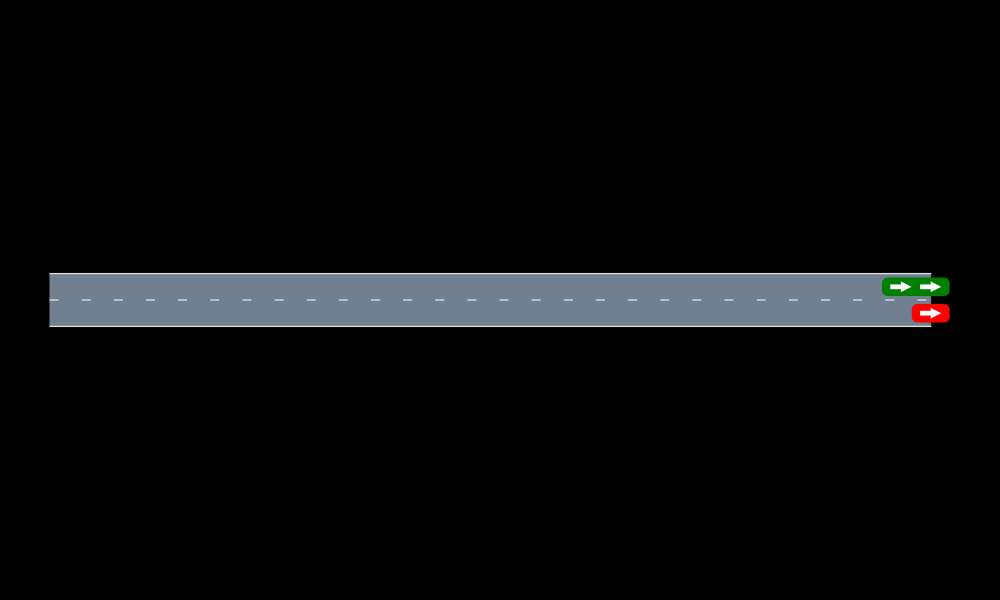

In [6]:
nticks = 100
rec = SceneRecord(nticks+1, timestep)
simulate!(rec, scene, roadway, models, nticks)
AutoViz.render(rec[0], roadway, cam=FitToContentCamera(), car_colors=carcolors)

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:frame_index=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
51), Observable{Int64} with 2 listeners. Value:
51, Scope("knockout-component-b6233f10-018d-4a1f-8dc2-22c66152cf8b", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["frame_index"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>101,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
51, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/pegasus/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/pegasus/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/pegasus/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/pegasus/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/pegasus/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":51}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-b6233f10-018d-4a1f-8dc2-22c66152cf8b\",\"id\":\"ob_02\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-b6233f10-018d-4a1f-8dc2-22c66152cf8b\",\"id\":\"ob_01\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n       
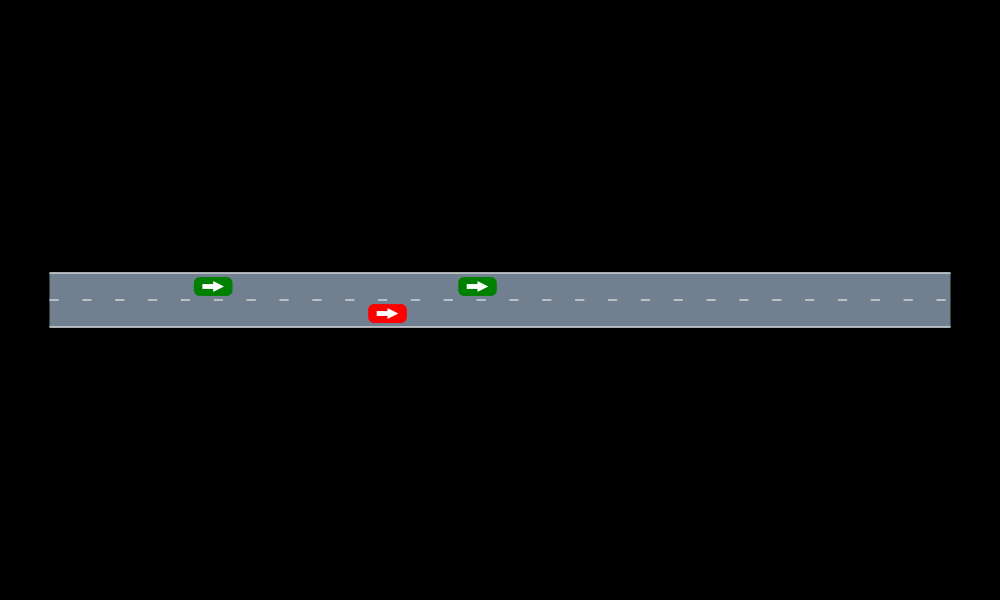
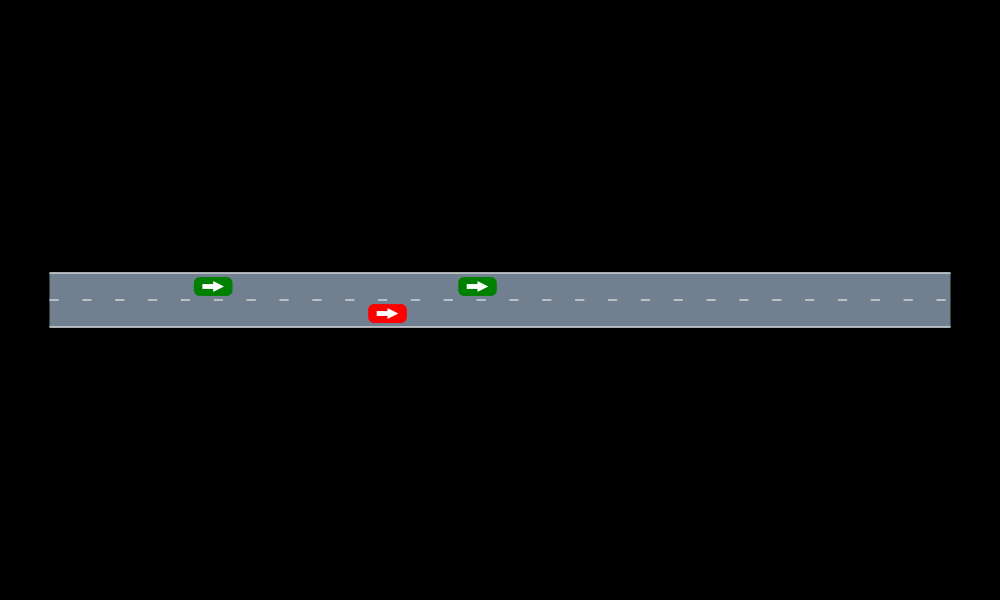

In [7]:
@manipulate for frame_index in 1 : nframes(rec)
    AutoViz.render(rec[frame_index-nframes(rec)], roadway, cam=FitToContentCamera(), car_colors=carcolors)
end

In [8]:
# state = ego vehicle state, action = tuple(long acceleration, steering)
@with_kw struct DrivingMDP <: MDP{Scene, LatLonAccel} # MDP{State, Action}
    r_goal::Float64 = 1.0 # reward for reaching goal (default 1)
    discount_factor::Float64 = 0.9 # discount
    cost::Float64 = -1.0
    road_length::Float64 = 100.0
    roadway::Roadway = gen_straight_roadway(2, road_length)
    delta_t::Float64 = 1.0
    ego_id::Int64 = 1
    timestep::Float64 = 0.1
    n_cars::Int64 = 3
    carcolors::Dict{Int,Colorant} = Dict()
    models::Dict{Int, DriverModel} = Dict()
    goal_pos::Frenet = Frenet(roadway[LaneTag(1,2)], road_length)
end

@show const LAT_LON_ACTIONS = [LatLonAccel(y, x) for x in -2:1.0:2 for y in -1:0.1:1]

function POMDPs.actions(mdp::DrivingMDP)
    return LAT_LON_ACTIONS
end

POMDPs.n_actions(mdp::DrivingMDP) = length(LAT_LON_ACTIONS)
@show DrivingMDP()

const LAT_LON_ACTIONS = [LatLonAccel(y, x) for x = -2:1.0:2 for y = -1:0.1:1] = LatLonAccel[LatLonAccel(-1.000, -2.000), LatLonAccel(-0.900, -2.000), LatLonAccel(-0.800, -2.000), LatLonAccel(-0.700, -2.000), LatLonAccel(-0.600, -2.000), LatLonAccel(-0.500, -2.000), LatLonAccel(-0.400, -2.000), LatLonAccel(-0.300, -2.000), LatLonAccel(-0.200, -2.000), LatLonAccel(-0.100, -2.000), LatLonAccel( 0.000, -2.000), LatLonAccel( 0.100, -2.000), LatLonAccel( 0.200, -2.000), LatLonAccel( 0.300, -2.000), LatLonAccel( 0.400, -2.000), LatLonAccel( 0.500, -2.000), LatLonAccel( 0.600, -2.000), LatLonAccel( 0.700, -2.000), LatLonAccel( 0.800, -2.000), LatLonAccel( 0.900, -2.000), LatLonAccel( 1.000, -2.000), LatLonAccel(-1.000, -1.000), LatLonAccel(-0.900, -1.000), LatLonAccel(-0.800, -1.000), LatLonAccel(-0.700, -1.000), LatLonAccel(-0.600, -1.000), LatLonAccel(-0.500, -1.000), LatLonAccel(-0.400, -1.000), LatLonAccel(-0.300, -1.000), LatLonAccel(-0.200, -1.000), LatLonAccel(-0.100, -1.000), LatLonAcc

DrivingMDP
  r_goal: Float64 1.0
  discount_factor: Float64 0.9
  cost: Float64 -1.0
  road_length: Float64 100.0
  roadway: Roadway
  delta_t: Float64 1.0
  ego_id: Int64 1
  timestep: Float64 0.1
  n_cars: Int64 3
  carcolors: Dict{Int64,Colorant}
  models: Dict{Int64,DriverModel}
  goal_pos: Frenet


In [9]:
function POMDPs.initialstate(mdp::DrivingMDP, rng::AbstractRNG)
    scene = Scene()
    def = VehicleDef()
    state1 = VehicleState(Frenet(mdp.roadway[LaneTag(1,1)],0.0), mdp.roadway, 10.0)
    veh1 = Entity(state1, def, mdp.ego_id)
    
    # carcolors = Dict{Int,Colorant}()
    mdp.carcolors[1] = colorant"red"
    mdp.carcolors[2] = colorant"green"
    mdp.carcolors[3] = colorant"green"

    # models = Dict{Int, DriverModel}()
    # double check dummy
    mdp.models[1] = AutomotivePOMDPs.EgoDriver(LatLonAccel(0.0, 0.0))
    # mdp.models[2] = Tim2DDriver(timestep, rec=SceneRecord(1, timestep, ncars))
    # mdp.models[3] = Tim2DDriver(timestep, rec=SceneRecord(1, timestep, ncars))
    mdp.models[2] = AutomotivePOMDPs.EgoDriver(LatLonAccel(0.0, 0.0))
    mdp.models[3] = AutomotivePOMDPs.EgoDriver(LatLonAccel(0.0, 0.0))

    state2 = VehicleState(Frenet(roadway[LaneTag(1,2)],0.0), mdp.roadway, 0.0)
    veh2 = Entity(state2, def, 2)

    state3 = VehicleState(Frenet(roadway[LaneTag(1,2)],10.0), mdp.roadway, 0.0)
    veh3 = Entity(state3, def, 3)

    push!(scene, veh1)
    push!(scene, veh2)
    push!(scene, veh3)
    return scene
end

In [10]:
?LaneTag

search: LaneTag has_lanetag NULL_LANETAG get_neighbor_lanetag_left



No documentation found.

# Summary

```
struct LaneTag <: Any
```

# Fields

```
segment :: Int64
lane    :: Int64
```


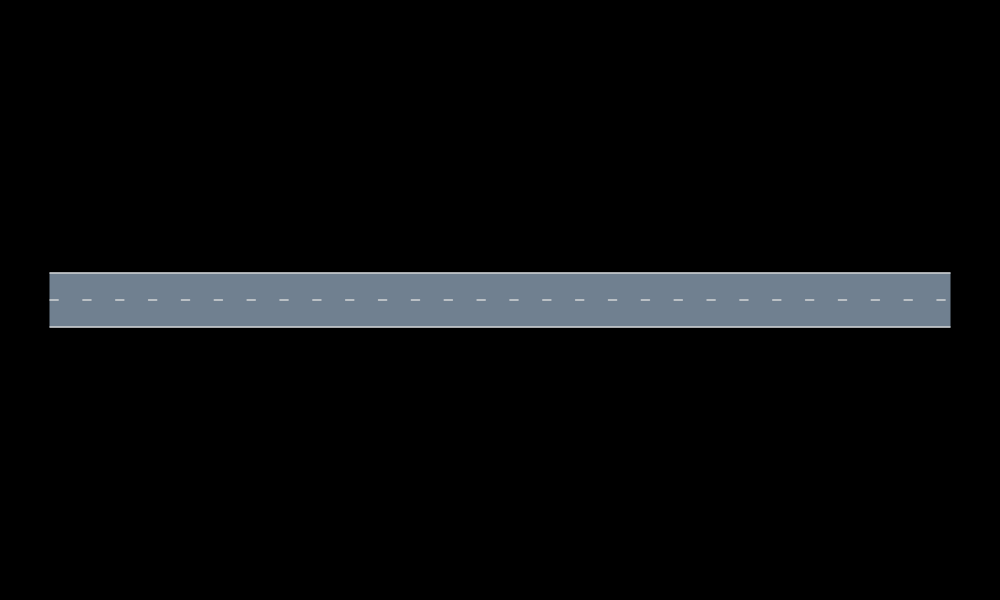

In [11]:
# state2 = VehicleState(Frenet(roadway[LaneTag(1,2)],0.0), mdp.roadway, 0.0)
veh2 = Entity(state2, def, 2)
AutoViz.render([roadway])

In [12]:
#generate next state
function POMDPs.generate_s(mdp::DrivingMDP, s::Scene, a::LatLonAccel, rng::AbstractRNG)
    sp = deepcopy(s)
    mdp.models[mdp.ego_id].a = a
    actions = Vector{LatLonAccel}(undef, mdp.n_cars)
    get_actions!(actions, s, mdp.roadway, mdp.models)
    ego = sp[findfirst(mdp.ego_id, s)]
    tick!(sp, mdp.roadway, actions, mdp.delta_t)
    return sp
end

In [13]:
function POMDPs.discount(mdp::DrivingMDP)
    return mdp.discount_factor
end

In [14]:
methods(LatLonAccel)

# 2 methods for generic function "(::Type)":
[1] LatLonAccel(a_lat::Float64, a_lon::Float64) in AutomotiveDrivingModels at /Users/pegasus/.julia/packages/AutomotiveDrivingModels/JHkPm/src/2d/actions/lat_lon_accel.jl:6
[2] LatLonAccel(a_lat, a_lon) in AutomotiveDrivingModels at /Users/pegasus/.julia/packages/AutomotiveDrivingModels/JHkPm/src/2d/actions/lat_lon_accel.jl:6

In [15]:
?Flux.onehot

No documentation found.

`Flux.onehot` is a `Function`.

```
# 2 methods for generic function "onehot":
[1] onehot(l, labels) in Flux at /Users/pegasus/.julia/packages/Flux/8XpDt/src/onehot.jl:60
[2] onehot(l, labels, unk) in Flux at /Users/pegasus/.julia/packages/Flux/8XpDt/src/onehot.jl:66
```


In [16]:
# fits state to vector to NN, needs change, esp w/ 2 lanes
# preallocate array
function POMDPs.convert_s(tv::Type{V}, s::Scene, mdp::DrivingMDP) where V<:AbstractArray
    ego = s[findfirst(mdp.ego_id, s)]
    laneego = ego.state.posF.roadind.tag.lane
    laneego = Flux.onehot(laneego,[1,2])
    other_vehicles = []
    for veh in s
        if veh.id != mdp.ego_id
            push!(other_vehicles, veh.state)
        end
    end
    svec = Float64[ego.state.posF.s/mdp.road_length, ego.state.v/20.0, laneego...]
    for veh in other_vehicles
        push!(svec, veh.posF.s/mdp.road_length)
        push!(svec, veh.v/20.0)
        laneveh = Flux.onehot(veh.posF.roadind.tag.lane,[1,2])
        push!(svec, laneveh...)
    end
    return svec
end

In [17]:
# convert state vector to scene object (POMDPs.convert_s(::Type{Scene}, ::V, mdp::DrivingMDP)) where V<:AbstractArray
function POMDPs.convert_s(ts::Type{Scene}, v::V, mdp::DrivingMDP) where V<:AbstractArray
    scene = Scene()
    def = VehicleDef()
    
    lane1 = v[3] == 1 ? LaneTag(1,1) : LaneTag(1,2)
    state1 = VehicleState(Frenet(mdp.roadway[lane1], v[1]*mdp.road_length), mdp.roadway, v[2]*20.0)
    veh1 = Entity(state1, def, mdp.ego_id)
    
    
    lane2 = v[7] == 1 ? LaneTag(1,1) : LaneTag(1,2)
    state2 = VehicleState(Frenet(mdp.roadway[lane2], v[5]*mdp.road_length), mdp.roadway, v[6]*20.0)
    veh2 = Entity(state2, def, 2)
    
    
    lane3 = v[11] == 1 ? LaneTag(1,1) : LaneTag(1,2)
    state3 = VehicleState(Frenet(mdp.roadway[lane3], v[9]*mdp.road_length), mdp.roadway, v[10]*20.0)
    veh3 = Entity(state3, def, 3)
    
    push!(scene, veh1)
    push!(scene, veh2)
    push!(scene, veh3)
    
    return scene
end

In [18]:
# make PR
function collision_helper(s::Scene, mdp::DrivingMDP)
    ego = s[findfirst(mdp.ego_id, s)]
    for veh in s
        if veh.id != mdp.ego_id
            if collision_checker(ego, veh)
                return true
            end
        end
    end
    return false
end

collision_helper (generic function with 1 method)

In [19]:
?Frenet.roadind

`Frenet` has fields `roadind`, `s`, `t`, and `ϕ`.


In [20]:
function off_road(s::Scene, mdp::DrivingMDP)
    ego = s[findfirst(mdp.ego_id, s)]
    if abs(ego.state.posF.t) >= 1.5
        return true
    end
    return false
end

off_road (generic function with 1 method)

In [21]:
# needs change, terminal both lanes, collision
function POMDPs.isterminal(mdp::DrivingMDP, s::Scene)
    ego = s[findfirst(mdp.ego_id, s)]
    if ego.state.posF.s >= mdp.road_length || collision_helper(s, mdp) || off_road(s, mdp)
        return true
    else
        return false
    end
end

In [22]:
function distance(s::Scene, mdp::DrivingMDP)
    ego = s[findfirst(mdp.ego_id, s)]
    goal = get_posG(mdp.goal_pos, mdp.roadway)
    d = norm(VecE2(goal - ego.state.posG))
    return d
end

distance (generic function with 1 method)

In [23]:
# needs change
function reachgoal(s::Scene, mdp::DrivingMDP)
    ego = s[findfirst(mdp.ego_id, s)]
    # goal = get_posG(mdp.goal_pos, mdp.roadway) get_lane
    if mdp.goal_pos.roadind.tag == ego.state.posF.roadind.tag && ego.state.posF.s >= mdp.road_length && abs(mdp.goal_pos.t-ego.state.posF.t) <= 0.5
        return true
    end
    return false
end

reachgoal (generic function with 1 method)

In [24]:
?Frenet

search: Frenet FrenetRelativePosition get_frenet_relative_position NULL_FRENET



Frenet ______ roadind: road index s: distance along lane t: lane offset, positive is to left. zero point is the centerline of the lane. ϕ: lane relative heading


In [25]:
# needs change, only reward for goal, neg reward for collision
function POMDPs.reward(mdp::DrivingMDP, s::Scene, a::LatLonAccel, sp::Scene)
    ego = s[findfirst(mdp.ego_id, s)]
    if collision_helper(sp, mdp) || off_road(sp, mdp)
        return -1.0
    elseif reachgoal(sp, mdp)
        return 1.0
    else
        r = -0.01*distance(sp, mdp)/mdp.road_length
        if off_road(sp, mdp)
#             r -= -0.01
        end
        return r
    end
end

In [26]:
function POMDPs.actionindex(mdp::DrivingMDP, a::LatLonAccel)
    return findfirst(isequal(a), POMDPs.actions(mdp))
end

In [27]:
# baseline hardcoded policy, masking
# if car on left don't go left
# lookahead all steps lead to crash are forbidden (forward search), exploration policy in DeepQLearning, 
speed_limit = 27.0
function safe_actions(mdp::DrivingMDP, s::Scene)
    safe_acts = []
    for a in actions(mdp)
        sp = deepcopy(s)
        action_list = LatLonAccel[LatLonAccel(0.,0.0) for veh in s if veh.id != mdp.ego_id]
        tick!(sp, mdp.roadway, [a, action_list...], mdp.delta_t)
        ego = sp[findfirst(mdp.ego_id, sp)]
        if !off_road(sp, mdp) && !collision_helper(sp, mdp) && ego.state.v < speed_limit
            push!(safe_acts, a)
        end
    end
    #check off road, immediate collisions (assume other car constant speed or acc), speed limit
    #epsilon-greedy on actions
    return safe_acts
end

safe_actions (generic function with 1 method)

In [28]:
fieldnames(VehicleState)

(:posG, :posF, :v)

In [29]:
function safe_actions(mdp::DrivingMDP, o::AbstractArray)
    s = POMDPs.convert_s(Scene, o, mdp)
    return safe_actions(mdp, s)
end

safe_actions (generic function with 2 methods)

In [30]:
methods(POMDPs.convert_s)

# 18 methods for generic function "convert_s":
[1] convert_s(::Type{Tuple{Float64,Float64}}, s::A, mc::MountainCar) where A<:AbstractArray in POMDPModels at /Users/pegasus/.julia/packages/POMDPModels/wnwgU/src/MountainCar.jl:45
[2] convert_s(::Type{Tuple{Float64,Float64}}, s::A, ip::InvertedPendulum) where A<:AbstractArray in POMDPModels at /Users/pegasus/.julia/packages/POMDPModels/wnwgU/src/InvertedPendulum.jl:73
[3] convert_s(::Type{LightDark1DState}, s::A, p::LightDark1D) where A<:AbstractArray in POMDPModels at /Users/pegasus/.julia/packages/POMDPModels/wnwgU/src/LightDark.jl:94
[4] convert_s(::Type{GridWorldState}, s::AbstractArray, mdp::LegacyGridWorld) in POMDPModels at /Users/pegasus/.julia/packages/POMDPModels/wnwgU/src/legacy/GridWorlds.jl:269
[5] convert_s(::Type{PedMDPState}, z::V, mdp::PedMDP) where V<:(AbstractArray{Float64,N} where N) in AutomotivePOMDPs at /Users/pegasus/.julia/packages/AutomotivePOMDPs/FspEv/src/explicit_pomdps/pedestrian_mdp/pomdp_types.jl:141
[6] convert_s(::Type{Array{Float64,1}}, s::Frame{Entity{VehicleState,VehicleDef,Int64}}, pomdp::UrbanPOMDP) in AutomotivePOMDPs at /Users/pegasus/.julia/packages/AutomotivePOMDPs/FspEv/src/generative_pomdps/urban/generative_model.jl:277
[7] convert_s(::Type{Array{Float64,1}}, s::PedMDPState, mdp::PedMDP) in AutomotivePOMDPs at /Users/pegasus/.julia/packages/AutomotivePOMDPs/FspEv/src/explicit_pomdps/pedestrian_mdp/pomdp_types.jl:126
[8] convert_s(ts::Type{Frame{Entity{VehicleState,VehicleDef,Int64}}}, v::V, mdp::DrivingMDP) where V<:AbstractArray in Main at In[17]:3
[9] convert_s(T::Type{A1}, s::A2, problem::Union{MDP, POMDP}) where {A1<:AbstractArray, A2<:AbstractArray} in POMDPs at /Users/pegasus/.julia/packages/POMDPs/JiYXY/src/pomdp.jl:168
[10] convert_s(::Type{A}, s::Number, problem::Union{MDP, POMDP}) where {F<:Number, A<:(AbstractArray{F<:Number,N} where N)} in POMDPs at /Users/pegasus/.julia/packages/POMDPs/JiYXY/src/pomdp.jl:170
[11] convert_s(::Type{N}, v::AbstractArray{F,N} where N, problem::Union{MDP, POMDP}) where {N<:Number, F<:Number} in POMDPs at /Users/pegasus/.julia/packages/POMDPs/JiYXY/src/pomdp.jl:171
[12] convert_s(T::Type{V}, s, pomdp::POMDPModelTools.FullyObservablePOMDP) where V<:AbstractArray in POMDPModelTools at /Users/pegasus/.julia/packages/POMDPModelTools/H7kTq/src/fully_observable_pomdp.jl:46
[13] convert_s(T::Type{S}, vec::V, pomdp::POMDPModelTools.FullyObservablePOMDP) where {S, V<:AbstractArray} in POMDPModelTools at /Users/pegasus/.julia/packages/POMDPModelTools/H7kTq/src/fully_observable_pomdp.jl:47
[14] convert_s(::Type{A}, s::Tuple{Float64,Float64}, mc::MountainCar) where A<:AbstractArray in POMDPModels at /Users/pegasus/.julia/packages/POMDPModels/wnwgU/src/MountainCar.jl:42
[15] convert_s(::Type{A}, s::Tuple{Float64,Float64}, ip::InvertedPendulum) where A<:AbstractArray in POMDPModels at /Users/pegasus/.julia/packages/POMDPModels/wnwgU/src/InvertedPendulum.jl:68
[16] convert_s(::Type{A}, s::LightDark1DState, p::LightDark1D) where A<:AbstractArray in POMDPModels at /Users/pegasus/.julia/packages/POMDPModels/wnwgU/src/LightDark.jl:93
[17] convert_s(::Type{A}, s::GridWorldState, mdp::LegacyGridWorld) where A<:AbstractArray in POMDPModels at /Users/pegasus/.julia/packages/POMDPModels/wnwgU/src/legacy/GridWorlds.jl:268
[18] convert_s(tv::Type{V}, s::Frame{Entity{VehicleState,VehicleDef,Int64}}, mdp::DrivingMDP) where V<:AbstractArray in Main at In[16]:4

In [31]:
function best_action(acts::Vector{A}, val::AbstractArray{T}, problem::M) where {A, T <: Real, M <: Union{POMDP, MDP}}
    best_a = acts[1]
    best_ai = actionindex(problem, best_a) 
    best_val = val[best_ai]
    for a in acts 
        ai = actionindex(problem, a)
        if val[ai] > best_val 
            best_val = val[ai]
            best_ai = ai 
            best_a = a
        end
    end
    return best_a::A
end

best_action (generic function with 1 method)

In [32]:
# define exploration policy with masking, obs is vector
function masked_linear_epsilon_greedy(max_steps::Int64, eps_fraction::Float64, eps_end::Float64)
    # define function that will be called to select an action in DQN
    # only supports MDP environments
    function action_masked_epsilon_greedy(policy::AbstractNNPolicy, env::MDPEnvironment, obs, global_step::Int64, rng::AbstractRNG)
        eps = DeepQLearning.update_epsilon(global_step, eps_fraction, eps_end, max_steps)
        acts = safe_actions(mdp, obs) #XXX using pomdp global variable replace by safe_actions(mask, obs)
        val = actionvalues(policy, obs) #change this
        if rand(rng) < eps
            return (rand(rng, acts), eps)
        else
            return (best_action(acts, val, env.problem), eps)
        end
    end
    return action_masked_epsilon_greedy
end

masked_linear_epsilon_greedy (generic function with 1 method)

In [33]:
function action_masked_epsilon_greedy(policy::AbstractNNPolicy, env::MDPEnvironment, obs, global_step::Int64, rng::AbstractRNG)
    eps = DeepQLearning.update_epsilon(global_step, eps_fraction, eps_end, max_steps)
    acts = safe_actions(mdp, obs) #XXX using pomdp global variable replace by safe_actions(mask, obs)
    val = actionvalues(policy, obs)
    if rand(rng) < eps
        return (rand(rng, acts), eps)
    else
        return (best_action(acts, val, env.problem), eps)
    end
end

action_masked_epsilon_greedy (generic function with 1 method)

In [53]:
#run random policies
mdp = DrivingMDP()
model = Chain(Dense(12, 32, tanh), Dense(32, 32, tanh), Dense(32, n_actions(mdp)))

solver = DeepQLearningSolver(qnetwork = model, max_steps=300_000, 
                             learning_rate=0.001,log_freq=500,
                             recurrence=false,double_q=true, dueling=false, prioritized_replay=true, eps_end=0.01,
                             target_update_freq = 3000, eps_fraction=0.5, train_start=10000, buffer_size=400000,
                             eval_freq=10_000)
    # exploration_policy=masked_linear_epsilon_greedy(300_000, 0.5, 0.01))
policy = solve(solver, mdp)

  500 / 300000 eps 0.997 |  avgR -0.851 | Loss 9.939e-02 | Grad 2.845e-02 
 1000 / 300000 eps 0.993 |  avgR -0.885 | Loss 1.014e-01 | Grad 4.630e-02 
 1500 / 300000 eps 0.990 |  avgR -0.894 | Loss 7.012e-02 | Grad 2.116e-02 
 2000 / 300000 eps 0.987 |  avgR -0.847 | Loss 8.426e-02 | Grad 7.149e-02 
 2500 / 300000 eps 0.984 |  avgR -0.797 | Loss 1.004e-01 | Grad 4.362e-02 
 3000 / 300000 eps 0.980 |  avgR -0.808 | Loss 7.681e-02 | Grad 1.421e-02 
 3500 / 300000 eps 0.977 |  avgR -0.866 | Loss 1.060e-01 | Grad 2.888e-02 
 4000 / 300000 eps 0.974 |  avgR -0.866 | Loss 9.536e-02 | Grad 7.548e-02 
 4500 / 300000 eps 0.970 |  avgR -0.877 | Loss 8.029e-02 | Grad 3.133e-02 
 5000 / 300000 eps 0.967 |  avgR -0.846 | Loss 7.641e-02 | Grad 1.748e-02 
 5500 / 300000 eps 0.964 |  avgR -0.845 | Loss 6.166e-02 | Grad 1.093e-02 
 6000 / 300000 eps 0.960 |  avgR -0.932 | Loss 7.523e-02 | Grad 4.091e-02 
 6500 / 300000 eps 0.957 |  avgR -0.900 | Loss 5.603e-02 | Grad 3.686e-02 
 7000 / 300000 eps 0.954 

52000 / 300000 eps 0.657 |  avgR -0.844 | Loss 3.018e-02 | Grad 1.593e-02 
52500 / 300000 eps 0.653 |  avgR -0.708 | Loss 3.536e-02 | Grad 1.118e-02 
53000 / 300000 eps 0.650 |  avgR -0.729 | Loss 2.475e-02 | Grad 1.583e-02 
53500 / 300000 eps 0.647 |  avgR -0.699 | Loss 4.571e-02 | Grad 2.163e-02 
54000 / 300000 eps 0.644 |  avgR -0.688 | Loss 3.169e-02 | Grad 2.656e-02 
54500 / 300000 eps 0.640 |  avgR -0.691 | Loss 3.498e-02 | Grad 1.498e-02 
55000 / 300000 eps 0.637 |  avgR -0.708 | Loss 3.557e-02 | Grad 3.148e-02 
55500 / 300000 eps 0.634 |  avgR -0.717 | Loss 3.764e-02 | Grad 1.178e-02 
56000 / 300000 eps 0.630 |  avgR -0.651 | Loss 2.487e-02 | Grad 1.526e-02 
56500 / 300000 eps 0.627 |  avgR -0.680 | Loss 2.916e-02 | Grad 2.054e-02 
57000 / 300000 eps 0.624 |  avgR -0.768 | Loss 3.806e-02 | Grad 9.683e-03 
57500 / 300000 eps 0.621 |  avgR -0.699 | Loss 2.438e-02 | Grad 1.795e-02 
58000 / 300000 eps 0.617 |  avgR -0.630 | Loss 3.694e-02 | Grad 1.013e-02 
58500 / 300000 eps 0.614 

105000 / 300000 eps 0.307 |  avgR -0.638 | Loss 4.120e-02 | Grad 1.395e-02 
105500 / 300000 eps 0.304 |  avgR -0.541 | Loss 4.258e-02 | Grad 3.202e-02 
106000 / 300000 eps 0.300 |  avgR -0.531 | Loss 4.394e-02 | Grad 2.621e-02 
106500 / 300000 eps 0.297 |  avgR -0.658 | Loss 4.180e-02 | Grad 1.542e-02 
107000 / 300000 eps 0.294 |  avgR -0.445 | Loss 4.563e-02 | Grad 1.636e-02 
107500 / 300000 eps 0.290 |  avgR -0.290 | Loss 5.098e-02 | Grad 3.042e-02 
108000 / 300000 eps 0.287 |  avgR -0.200 | Loss 3.318e-02 | Grad 3.137e-02 
108500 / 300000 eps 0.284 |  avgR -0.424 | Loss 4.076e-02 | Grad 1.752e-02 
109000 / 300000 eps 0.281 |  avgR -0.441 | Loss 3.717e-02 | Grad 9.702e-03 
109500 / 300000 eps 0.277 |  avgR -0.425 | Loss 2.633e-02 | Grad 9.390e-03 
110000 / 300000 eps 0.274 |  avgR -0.554 | Loss 4.275e-02 | Grad 2.673e-02 
Evaluation ... Avg Reward -1.0379908229441244
110500 / 300000 eps 0.271 |  avgR -0.612 | Loss 4.743e-02 | Grad 1.220e-02 
111000 / 300000 eps 0.267 |  avgR -0.690 |

157500 / 300000 eps 0.010 |  avgR -0.646 | Loss 3.604e-02 | Grad 1.518e-02 
158000 / 300000 eps 0.010 |  avgR -0.795 | Loss 4.983e-02 | Grad 2.800e-02 
158500 / 300000 eps 0.010 |  avgR -0.912 | Loss 5.231e-02 | Grad 1.574e-02 
159000 / 300000 eps 0.010 |  avgR -0.687 | Loss 4.982e-02 | Grad 1.415e-02 
159500 / 300000 eps 0.010 |  avgR -0.734 | Loss 6.724e-02 | Grad 5.264e-02 
160000 / 300000 eps 0.010 |  avgR -0.494 | Loss 3.724e-02 | Grad 1.024e-02 
Evaluation ... Avg Reward -0.030233368351594483
160500 / 300000 eps 0.010 |  avgR -0.529 | Loss 4.092e-02 | Grad 5.551e-02 
161000 / 300000 eps 0.010 |  avgR -0.484 | Loss 3.585e-02 | Grad 1.442e-02 
161500 / 300000 eps 0.010 |  avgR -0.257 | Loss 5.366e-02 | Grad 5.785e-02 
162000 / 300000 eps 0.010 |  avgR -0.197 | Loss 3.791e-02 | Grad 9.239e-03 
162500 / 300000 eps 0.010 |  avgR -0.589 | Loss 3.234e-02 | Grad 1.020e-02 
163000 / 300000 eps 0.010 |  avgR -0.662 | Loss 2.640e-02 | Grad 1.841e-02 
163500 / 300000 eps 0.010 |  avgR -0.697

209500 / 300000 eps 0.010 |  avgR -0.710 | Loss 3.137e-02 | Grad 1.461e-02 
210000 / 300000 eps 0.010 |  avgR -0.369 | Loss 5.923e-02 | Grad 2.231e-02 
Evaluation ... Avg Reward -1.0344390875614382
210500 / 300000 eps 0.010 |  avgR -0.397 | Loss 2.452e-02 | Grad 4.218e-02 
211000 / 300000 eps 0.010 |  avgR -0.561 | Loss 4.058e-02 | Grad 1.724e-02 
211500 / 300000 eps 0.010 |  avgR -0.538 | Loss 3.882e-02 | Grad 1.850e-02 
212000 / 300000 eps 0.010 |  avgR -0.557 | Loss 3.632e-02 | Grad 9.508e-03 
212500 / 300000 eps 0.010 |  avgR -0.365 | Loss 3.835e-02 | Grad 1.006e-02 
213000 / 300000 eps 0.010 |  avgR -0.269 | Loss 4.923e-02 | Grad 1.623e-02 
213500 / 300000 eps 0.010 |  avgR -0.573 | Loss 3.087e-02 | Grad 2.988e-02 
214000 / 300000 eps 0.010 |  avgR -0.970 | Loss 4.657e-02 | Grad 3.214e-02 
214500 / 300000 eps 0.010 |  avgR -1.029 | Loss 5.568e-02 | Grad 2.819e-02 
215000 / 300000 eps 0.010 |  avgR -0.931 | Loss 4.910e-02 | Grad 2.553e-02 
215500 / 300000 eps 0.010 |  avgR -0.889 |

NNPolicy{DrivingMDP,Chain{Tuple{Dense{typeof(tanh),TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}},Dense{typeof(tanh),TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}},Dense{typeof(identity),TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}}}},LatLonAccel}(DrivingMDP
  r_goal: Float64 1.0
  discount_factor: Float64 0.9
  cost: Float64 -1.0
  road_length: Float64 100.0
  roadway: Roadway
  delta_t: Float64 1.0
  ego_id: Int64 1
  timestep: Float64 0.1
  n_cars: Int64 3
  carcolors: Dict{Int64,Colorant}
  models: Dict{Int64,DriverModel}
  goal_pos: Frenet
, Chain(Dense(12, 32, tanh), Dense(32, 32, tanh), Dense(32, 105)), LatLonAccel[LatLonAccel(-1.000, -2.000), LatLonAccel(-0.900, -2.000), LatLonAccel(-0.800, -2.000), LatLonAccel(-0.700, -2.000), LatLonAccel(-0.600, -2.000), LatLonAccel(-0.500, -2.000), LatLonAccel(-0.400, -2.000), LatLonAccel(-0.300, -2.000), LatLonAccel(-0.200, -2.000), LatLonAccel(-0.100, -2.000)  …  LatLonAccel( 0.1

In [54]:
using POMDPPolicies
policy1 = FunctionPolicy(s -> actions(mdp)[2])
hr = HistoryRecorder(max_steps=100)
history = simulate(hr, mdp, policy, POMDPs.initialstate(mdp, MersenneTwister(1)));
print(policy)

NNPolicy{DrivingMDP,Chain{Tuple{Dense{typeof(tanh),TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}},Dense{typeof(tanh),TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}},Dense{typeof(identity),TrackedArray{…,Array{Float32,2}},TrackedArray{…,Array{Float32,1}}}}},LatLonAccel}(DrivingMDP
  r_goal: Float64 1.0
  discount_factor: Float64 0.9
  cost: Float64 -1.0
  road_length: Float64 100.0
  roadway: Roadway
  delta_t: Float64 1.0
  ego_id: Int64 1
  timestep: Float64 0.1
  n_cars: Int64 3
  carcolors: Dict{Int64,Colorant}
  models: Dict{Int64,DriverModel}
  goal_pos: Frenet
, Chain(Dense(12, 32, tanh), Dense(32, 32, tanh), Dense(32, 105)), LatLonAccel[LatLonAccel(-1.000, -2.000), LatLonAccel(-0.900, -2.000), LatLonAccel(-0.800, -2.000), LatLonAccel(-0.700, -2.000), LatLonAccel(-0.600, -2.000), LatLonAccel(-0.500, -2.000), LatLonAccel(-0.400, -2.000), LatLonAccel(-0.300, -2.000), LatLonAccel(-0.200, -2.000), LatLonAccel(-0.100, -2.000), LatLonAccel( 0.000,

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:frame_index=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
4), Observable{Int64} with 2 listeners. Value:
4, Scope("knockout-component-ae776fa7-8eb2-42d5-9548-eee8cf47fc47", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["frame_index"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>7,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
4, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/pegasus/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/pegasus/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/pegasus/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/pegasus/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/pegasus/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":4}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-ae776fa7-8eb2-42d5-9548-eee8cf47fc47\",\"id\":\"ob_27\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-ae776fa7-8eb2-42d5-9548-eee8cf47fc47\",\"id\":\"ob_26\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n   
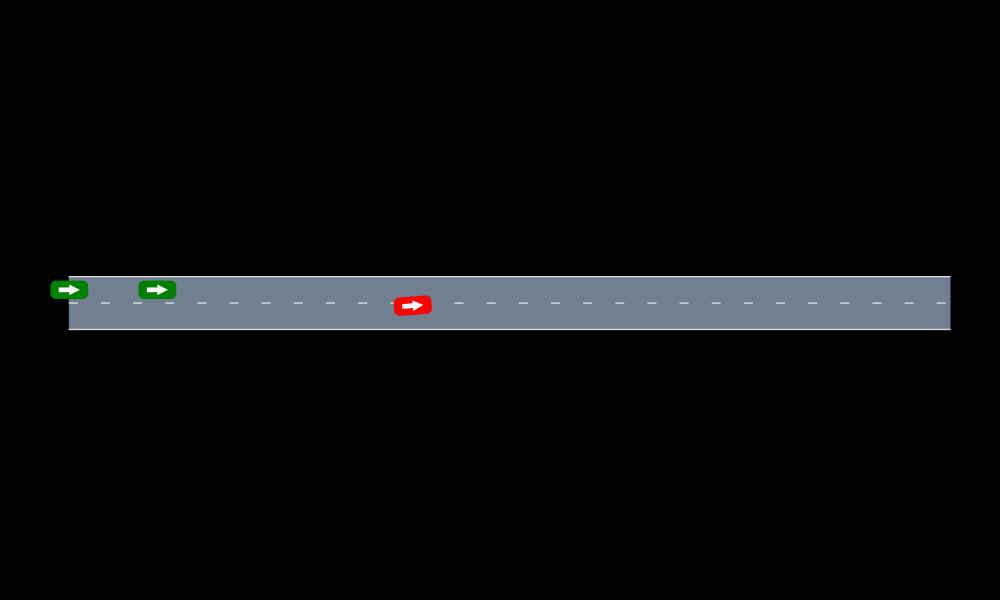
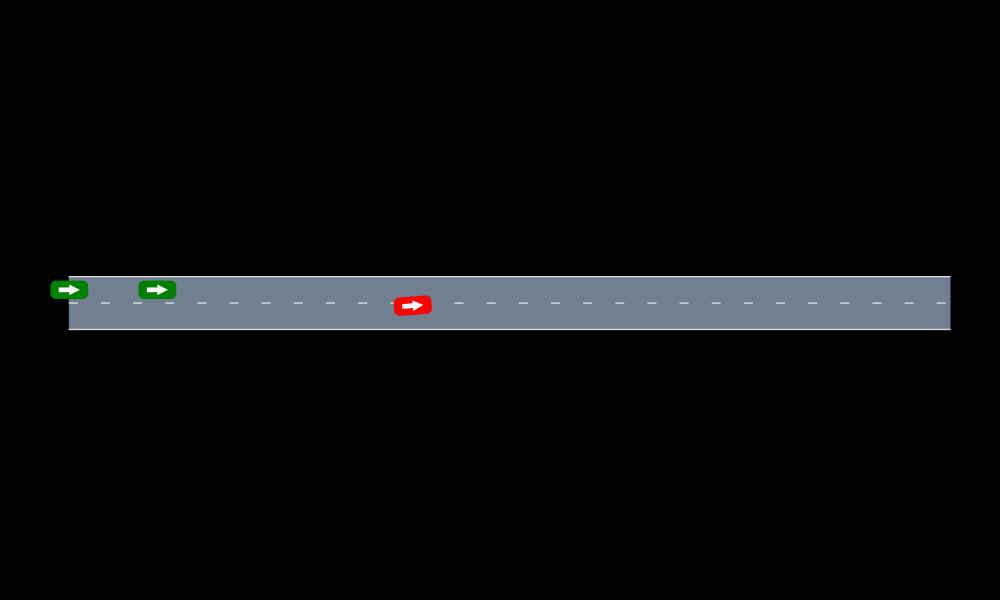

In [55]:
@manipulate for frame_index in 1 : n_steps(history)
    AutoViz.render(history.state_hist[frame_index], mdp.roadway, cam=FitToContentCamera(), car_colors=carcolors)
end
# print(history.state_hist[end])

In [56]:
s = history.state_hist[end]
isterminal(mdp, s)
# off_road(s, mdp)
reachgoal(s, mdp)

true

In [38]:
ego = get_ego(s)

Vehicle(1, VehicleState(VecSE2({84.000, -1.700}, -0.351), Frenet(RoadIndex({1, 0.840000}, {1, 1}), 84.000, -1.700, -0.351), 6.391), VehicleDef(CAR, 4.000, 1.800))

In [39]:
ego.state.posF.t

-1.7000000000000006